這份 Notebook 示範 OpenAI API 的 multi-modal 功能

In [1]:
# Import necessary libraries
## 設定 OpenAI API Key 變數
from dotenv import load_dotenv
import os

# Load the environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv('OPENAI_API_KEY')


In [2]:
import requests
import json
from pprint import pp

In [15]:
def get_completion(messages, model="gpt-4.1-nano", temperature=0, max_completion_tokens=8000, format_type=None):
  payload = { "model": model, "temperature": temperature, "messages": messages, "max_completion_tokens": max_completion_tokens }
  if format_type:
    payload["response_format"] =  { "type": format_type }

  headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
  response = requests.post('https://api.openai.com/v1/chat/completions', headers = headers, data = json.dumps(payload) )
  obj = json.loads(response.text)
  if response.status_code == 200 :
    return obj["choices"][0]["message"]["content"]
  else :
    return obj["error"]

## 文字轉語音 API 
- TTS‑1 / TTS‑1‑HD
屬於早期推出的 TTS 模型，使用固定風格，調音變化有限。
缺乏調性引導能力，聲音較單一。

- gpt‑4o‑mini‑tts
建構在 GPT‑4o-mini 架構上，可藉由「指令引導」調整語音風格，例如：「用客服語氣說話」、「模仿書主播」，甚至能加入情緒或語速指令 
支援多樣 preset voices（Alloy、Ash、Ballad…等）並可切換語氣、語速、音調，用於創造不同「vibe」 



## TTS-1 API

Cost: 15.00

In [10]:
from IPython.display import Audio

# voice 有 alloy, echo, fable, onyx, nova, and shimmer 可以換不同聲音
# speed 從 0.25 ~ 4，預設正常是 1
payload = { "model": "tts-1", 
           "speed": 1.25, 
           "voice": "nova", 
           "input": """南港在北部，北港在中南部，中港只在台中。
南港有南港路，北港有北港路，台中有中港路，但三條路都沒接在一起。
南港的南港路不通北港的北港路，北港的北港路也不會彎到中港的中港路。
台中中港路直通台中港，南港南港路卻通不了什麼港。
北港雖有北港大橋，不過過橋也到不了南港。
南港的人不會開車去北港，北港的人若要去南港，要繞過半個台灣。
你說中港是哪裡？中港本來是台中港，現在只剩中港路，開到盡頭是台中港，不是南港，也不是北港。
有港的地方都不在港邊，有路的地方卻不一定通到港。
台灣地名真奇妙，港來港去各有港，名字很像，實際上是八竿子打不著。""" }
headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
response = requests.post('https://api.openai.com/v1/audio/speech', headers = headers, data = json.dumps(payload) )

with open('./content/sample-tts-1.mp3', 'wb') as file:
    file.write(response.content)

Audio('./content/sample-tts-1.mp3', autoplay=True)

## GPT-4o mini TTS (text-to-speech)

* Input: 0.60
* Output: 12.00

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI

client = OpenAI( api_key=openai_api_key )
speech_file_path = "./content/sample-gpt-4o-mini-tts.mp3"

with client.audio.speech.with_streaming_response.create(
    model="gpt-4o-mini-tts",
    voice="nova",
    input="""南港在北部，北港在中南部，中港只在台中。
南港有南港路，北港有北港路，台中有中港路，但三條路都沒接在一起。
南港的南港路不通北港的北港路，北港的北港路也不會彎到中港的中港路。
台中中港路直通台中港，南港南港路卻通不了什麼港。
北港雖有北港大橋，不過過橋也到不了南港。
南港的人不會開車去北港，北港的人若要去南港，要繞過半個台灣。
你說中港是哪裡？中港本來是台中港，現在只剩中港路，開到盡頭是台中港，不是南港，也不是北港。
有港的地方都不在港邊，有路的地方卻不一定通到港。
台灣地名真奇妙，港來港去各有港，港港港..港你老師都分不清。""",
    instructions="Speak extremely rapidly with sharp pitch variations. Dramatically rise and fall on key words, maintaining rapid-fire pace throughout.",
) as response:
    response.stream_to_file(speech_file_path)

In [15]:
Audio('./content/sample-gpt-4o-mini-tts.mp3', autoplay=True)

若你重視：「不只是唸出文字，而是“怎麼唸”也要可調控」——推薦使用 gpt‑4o‑mini‑tts。
它在價格、音質及語氣控制上都大幅勝過 TTS‑1，目前已成為官方推薦的主流 TTS 模型。

## GPT image generation

2025/4/24 開放新模型 API，可以生成圖片、編輯圖片，編輯特定位置(透過透明 mask png)，還可以生成透明圖片

https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1


以下是整理後的表格，將文件內容中的模型與 API 功能進行歸納：


| **模型名稱**    | **支援的 API**       | **功能**                                                                                                     | **適用情境**                                                                 |
|-----------------|---------------------|-------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **GPT Image 1** | Image API, Responses API | - 高品質影像生成<br>- 文本渲染<br>- 詳細編輯<br>- 使用世界知識進行影像創作                                     | - 需要高品質影像生成<br>- 互動式影像生成<br>- 多輪編輯影像                   |
| **DALL·E 2**    | Image API           | - 影像生成<br>- 編輯（遮罩編輯/Inpainting）<br>- 影像變體生成                                                 | - 成本較低<br>- 支援多並發請求<br>- 需要遮罩編輯或影像變體生成              |
| **DALL·E 3**    | Image API           | - 高品質影像生成<br>- 支援更高解析度                                                                          | - 尋求高解析度影像<br>- 需要更細緻的影像品質                                |

### API 功能比較

| **API 類型**      | **支援模型**        | **功能**                                                                                                     | **適用情境**                                                                 |
|-------------------|---------------------|-------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Image API**     | GPT Image 1, DALL·E 2, DALL·E 3 | - 單次影像生成<br>- 編輯影像<br>- 影像變體生成                                                               | - 單次影像生成或編輯<br>- 需要遮罩編輯或影像變體生成                        |
| **Responses API** | GPT Image 1         | - 多輪互動式影像生成<br>- 流式生成<br>- 靈活輸入（檔案 ID、Base64 編碼）<br>- 高保真編輯                      | - 需要多輪互動<br>- 需要流式生成影像<br>- 需要更靈活的影像生成方式          |

此表格整合了模型與 API 的功能，方便快速理解與選擇適合的工具。若需要更詳細的資訊，可以進一步詢問！

In [4]:
payload = { "prompt": "Elon musk 與川普手牽手，奴役人類", 
           "model": "gpt-image-1", 
           "quality": "low", 
           "size": "1024x1024", 
           "moderation": "low" }

headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
response = requests.post('https://api.openai.com/v1/images/generations', headers = headers, data = json.dumps(payload) )

obj = json.loads(response.text)
obj

{'error': {'message': 'Your organization must be verified to use the model `gpt-image-1`. Please go to: https://platform.openai.com/settings/organization/general and click on Verify Organization. If you just verified, it can take up to 15 minutes for access to propagate.',
  'type': 'invalid_request_error',
  'param': None,
  'code': None}}

In [17]:
image_base64 = obj['data'][0]['b64_json']

KeyError: 'data'

In [ ]:
from IPython.display import Image

import base64

image_bytes = base64.b64decode(image_base64)

# Save the image to a file
with open("gpt-image.png", "wb") as f:
    f.write(image_bytes)

Image("gpt-image.png", width="256")

Output hidden; open in https://colab.research.google.com to view.

## 圖片解讀

文件: https://platform.openai.com/docs/guides/images?api-mode=chat

* content 參數變成 hash of array 傳遞，可同時傳多張圖片
* 圖片可用 url 或是 base64 編碼上傳
* 計費會用每 32px x 32px 當作一個 token 來計算

<img src="https://images.unsplash.com/photo-1551183053-bf91a1d81141" width="300">

In [7]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://images.unsplash.com/photo-1551183053-bf91a1d81141" },
                },
                { "type": "text", "text": "描述這張照片" }
            ] }
]

get_completion(messages, model="gpt-4.1-nano")

'這張照片展示了一盤美味的意大利麵，配料豐富，包括牛肉塊、櫻桃番茄、菠菜和其他蔬菜。麵條呈金黃色，搭配濃郁的醬汁，看起來非常誘人。整體色彩鮮豔，讓人垂涎欲滴。'

<img src="https://images.unsplash.com/photo-1546069901-ba9599a7e63c" width="300">

In [16]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://images.unsplash.com/photo-1546069901-ba9599a7e63c" },
                },
                { "type": "text", "text": "請問這是什麼菜? 卡路里估計多少? 拆解食材進行分析" }
            ] }
]

print(get_completion(messages, model="gpt-4.1-nano"))

這是一碗沙拉，包含多種新鮮蔬菜和烤雞肉。  
主要食材包括：  
- 小番茄（紅色）  
- 紫甘藍（紫色）  
- 黃玉米粒  
- 黃綠色豆子（可能是青豆或毛豆）  
- 黃綠色切碎的黃瓜或青瓜  
- 生菜或綠葉蔬菜  
- 烤雞胸肉（切塊）  
- 兩個水煮蛋  

**卡路里估計（大約值）：**  
- 烤雞胸肉（約100克）：約165卡  
- 兩個水煮蛋：約140卡  
- 小番茄（約50克）：約10卡  
- 紫甘藍（約30克）：約10卡  
- 玉米粒（約50克）：約50卡  
- 青豆（約30克）：約40卡  
- 黃瓜（約50克）：約8卡  
- 生菜（約50克）：約10卡  

總計：約430-470卡左右，視份量和調味料的使用情況而定。

這是一份營養豐富、低熱量且富含蛋白質和纖維的沙拉，非常適合作為健康餐點。


<img src="https://png.pngtree.com/design-canvas/en/chic-summer-shades-soiree-poster_49227.jpg" width="300">

In [10]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://png.pngtree.com/design-canvas/en/chic-summer-shades-soiree-poster_49227.jpg" },
                },
                { "type": "text", "text": "請擷取這張海報，擷取出 1.標題 2. 活動時間" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-mini")
print(x)




1. 標題：SUMMER FESTIVAL  
2. 活動時間：2022年6月19日，星期日


## 辨識文章

<img src="https://ihower.tw/data/images/chinese-article.png" width="300">

```
一、策略構想的意義與重要性
基本上「策略形態」只是客觀而具體的描述企業經營的形貌。如果想進一
步評估企業長期存活或經營成功的原因，就必需進一步了解並分析此一策略形
態背後的「策略構想」。簡言之，即是試圖解釋何以見得此一策略形態是有道理
的？策略形態與當時的「環境」、「條件」、「目標組合」（「環條目」）之間是怎麼
配合的？策略形態各構面之間又是如何配合的？
一個從過去到現在，都相當成功的企業，除了可以明確說明其策略形態之
外，它的策略構想也必然十分清晰且極有說服力。而且此一成功的企業，如果
具有高度的自省能力，就應經常檢視本身策略構想中，過去賴以成功的「環
境」與「條件」，甚至「目標」等因素是否已經開始發生變化？如果「環條目」
的狀態已與過去不盡相同，就顯示有調整策略的必要。
構思未來的策略方案的選項時，除了應儘量具體描述其策略形態之外，也
應分析並說明其策略構想。因為策略的可行性或成功機率，與未來的「環境」、
「條件」等的狀態密切相關，因此從策略構想的分析中，找出這些與未來策略
成敗攸關的內外因素，並試圖進行預測與驗證，是策略決策中極為重要的步
驟。
```


In [ ]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://ihower.tw/data/images/chinese-article.png" },
                },
                { "type": "text", "text": "請辨識圖片中的文字，並保留換行。only response json format:" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano", format_type="json_object")
print( json.loads(x)["text"] )

一、策略構想的意義與重要性
基本上【策略形態】只是要符合企業整體策略的形態。如果想進一步將企業長期存活或發展成功的原因，就必須進一步了解分析策略形態的特徵的【簡言之】，即以瞭解策略何以可以使一策略形態具有合理的【環境】、【條件】、【目標組合】【環像目】之問題是怎麼配合的。策略形態與時的【環境】、【條件】、【目標組合】【環像目】之問題是怎麼配合的策略形態各種層次之間又如何配合的？
一個從這到現在，都相信成功的企業，除了可以明確說明策略形態之外，的策略構想也必須十分清楚且具有說服力。而且成功的企業，如果具有高的自信能力，就應該將視於策略構想中，過去或以成功的【環境】與【條件】，甚至【目標】等因素已經開始變化？如果【環像目】的狀態已經不同，則顯示不清楚策略構想的內容或內因，並試圖進行預測驗證，是策略決策中極為重要的步驟。


## 辨識常見名字

<img src="https://ihower.tw/data/images/chinese-characters.png" width="300">

In [ ]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://ihower.tw/data/images/chinese-characters.png" },
                },
                { "type": "text", "text": "請辨識圖片中的文字，並保留換行。only response json format:" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-mini", format_type="json_object")
print( json.loads(x)["text"] )

鴻賢鈴希凱忠勇潔明坤
佳琳琦詩雄柔國寶仁祥
竹禎鈺菁芳悅藝瑤彥哲
暐美淑文瑞柏遠詠錦建
嘉芬穎榮旭安裕薇達晨
育怡豪華蕙桂琪泓雅曉
鵬家倩泰念鈞雯庭立婷
聖芸慧誠亮志宇信良羽
蓉翔雲瑜毅俊玉喬宗靜
維娟棋順岳筠翰軍傑昇


In [ ]:
correct_str = """鴻賢鈴希凱忠勇潔明坤
佳琳琦詩雄柔國寶仁祥
竹禎鈺菁芳悅藝琬彥哲
暉美淑文瑞柏遠詠錦建
嘉芬穎榮旭安裕薇達晨
育怡豪華蕙桂琪泓雅曉
鵬家倩泰念鈞雯庭立婷
聖芸慧誠亮志宇信良羽
蓉翔雲瑜毅俊玉喬宗靜
維娟棋順岳筠翰軍傑昇"""

def compare_strings(str1, str2):
    # 去除空白和換行
    clean_str1 = ''.join(str1.split())
    clean_str2 = ''.join(str2.split())

    # 計算相同字元的數量
    same_count = sum(1 for a, b in zip(clean_str1, clean_str2) if a == b)

    # 計算準確率
    total_chars = len(clean_str1)
    accuracy = same_count / total_chars

    return accuracy

In [ ]:
compare_strings(correct_str, json.loads(x)["text"])

0.98

## 解讀流程圖

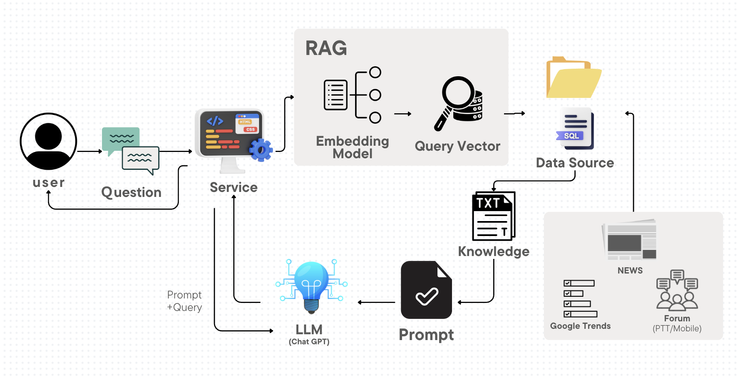

In [17]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://resize-image.vocus.cc/resize?compression=6&norotation=true&url=https%3A%2F%2Fimages.vocus.cc%2Faa0c9ef7-5c1d-4a6d-9e3f-592419966a9f.png&width=740&sign=IbDIoXXVXTNFy30bnWw5TUeYk3Qg0QkZBFCK6aW9X04" } ,
                },
                { "type": "text", "text": "請根據這個流程，寫出文字版流程" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

當用戶提出問題時，系統會先接收並分析該問題。  
接著，系統會根據問題生成一個提示（Prompt）並傳送給大型語言模型（LLM，例如ChatGPT）以產生相關的回答內容。  
同時，系統會將用戶的問題轉換成查詢向量（Query Vector），這個向量是由嵌入模型（Embedding Model）產生，用來在資料庫中搜尋相關資料。  
資料庫（Data Source）包含各種資料，例如新聞、論壇、Google趨勢等，系統會根據查詢向量找到相關的資料。  
找到相關資料後，系統會將資料與知識庫（Knowledge）結合，並產生一個完整的回答（Prompt）。  
最後，系統會將這個回答傳送給用戶，並提供相關的資料或資訊。


In [20]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://resize-image.vocus.cc/resize?compression=6&norotation=true&url=https%3A%2F%2Fimages.vocus.cc%2Faa0c9ef7-5c1d-4a6d-9e3f-592419966a9f.png&width=740&sign=IbDIoXXVXTNFy30bnWw5TUeYk3Qg0QkZBFCK6aW9X04" },
                },
                { "type": "text", "text": "如果系統輸出和使用者問答不相符，可能環節在哪邊出問題。先分問題面向，解析並結構輸出。" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

當系統輸出與使用者的問答不相符時，問題可能出現在以下幾個環節。以下是問題面向的解析與結構化分析：

一、輸入階段
1. 使用者問題（Question）：
   - 內容不清楚或模糊，導致系統理解偏差。
   - 問題範圍超出系統能力或資料範圍。
2. 提示與查詢（Prompt + Query）：
   - 提示設計不佳，未能引導系統產生正確回答。
   - 查詢（Query）未正確轉換成系統理解的格式。

二、處理階段
3. 服務（Service）：
   - 轉換過程中資訊傳遞錯誤或遺漏。
   - 內部模型（如RAG、LLM）理解偏差或資料不足。
4. RAG（Retrieval-Augmented Generation）：
   - 相關資料（Data Source）未能正確檢索到所需資訊。
   - 檢索結果（Data Source）不完整或不準確。
5. LLM（Chat GPT）：
   - 生成內容偏離用戶需求或資料內容。
   - 生成模型理解偏差或語境錯誤。

三、輸出階段
6. 輸出結果（系統回答）：
   - 與用戶問題不符，可能因資料錯誤或模型偏差。
   - 輸出格式或內容不符合預期。

四、資料與知識庫
7. 知識庫（Knowledge）：
   - 資料更新不及時或資料本身有誤。
   - 資料範圍與用戶需求不符。

五、整體流程
8. 系統整合與調校：
   - 不同模組間的協調問題。
   - 設計缺陷或調校不足。

總結：
- 問題可能出在資料檢索不準確或不完整。
- 模型理解偏差或生成偏離。
- 提示設計不佳或用戶問題模糊。
- 系統整合或流程設計缺陷。

建議：
- 檢查資料庫與檢索流程。
- 優化提示與查詢設計。
- 針對模型進行微調與測試。
- 改善用戶問題的明確性。

這樣的結構化分析有助於定位問題環節，進而進行針對性改善。


<img src="https://ihower.tw/data/images/openai.jpg" width="400">

In [ ]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://ihower.tw/data/images/openai.jpg" },
                },
                { "type": "text", "text": "請分析這家公司的架構圖，請一步一步解讀思考，最後再總結有哪些潛在治理問題" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

當然，讓我們逐步分析這個公司架構圖，並思考潛在的治理問題。

### 一、架構圖逐步解讀

1. **董事會（Board of directors）**
   - 最高決策層，控制整體公司方向與策略。

2. **OpenAI, Inc.（501(c)(3) 公益公司）**
   - 由董事會控制，具有公益性質，非營利組織。
   - 由董事會控制，且完全擁有並控制OpenAI GP LLC。

3. **OpenAI GP LLC（有限責任公司）**
   - 由OpenAI, Inc.全資擁有，控制OpenAI GP LLC的運作。
   - 控制權由OpenAI, Inc.掌握。

4. **OpenAI Global, LLC（ capped profit公司）**
   - 由OpenAI GP LLC的多數股東（主要是OpenAI, Inc.）擁有。
   - 具有“ capped profit”特性，限制盈利上限。
   - 由OpenAI GP LLC控制。

5. **其他投資者（Employees & other investors）**
   - 由OpenAI GP LLC擁有部分股份，控制權由OpenAI GP LLC掌握。

6. **Microsoft**
   - 具有少數股權（minority owner），但不控制公司。
   - 可能是投資者或合作夥伴。

7. **OpenAI LP（OpenAI GP LLC的子公司）**
   - 由OpenAI GP LLC控制，可能是運營實體。

8. **OpenAI LLC（OpenAI GP LLC的子公司）**
   - 由OpenAI GP LLC控制，可能是技術或產品實作單位。

### 二、潛在的治理問題

1. **多層控股結構的複雜性**
   - 多層控股（董事會→公益公司→有限責任公司→ capped profit公司）可能導致決策流程繁瑣，責任不清。
   - 這種結構可能使得監督與問責變得困難，尤其是在不同法律與稅務管轄區。

2. **公益與營利的平衡**
   - 由公益公司控制營利公司，可能會出現公益使命與商業利益之間的衝突。
   - 如何確保公司在追求盈利的同時，仍能履行公益使命，是一個治理挑戰。

3. **控制權集中與分散**
   - Open

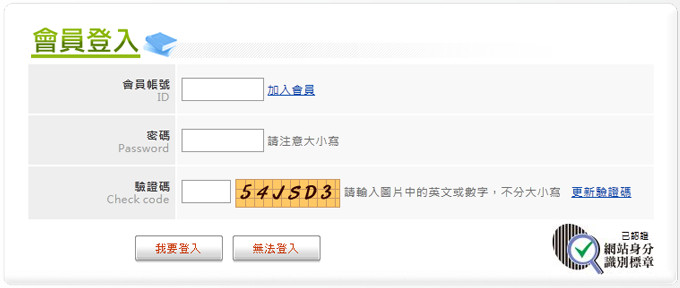

In [23]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url" : "https://www.books.com.tw/csss/private/qa/images/step_ShoppingProcess/ShoppingProcess_01.jpg" },
                },
                { "type": "text", "text": "請告訴畫面中的驗證碼是什麼? 英數字" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

畫面中的驗證碼是：5 4 5 J S 0 3


In [24]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url" : "https://www.books.com.tw/csss/private/qa/images/step_ShoppingProcess/ShoppingProcess_01.jpg" },
                },
                { "type": "text", "text": "請告訴畫面中的驗證碼是什麼? 英數字" }
            ] }
]

x = get_completion(messages, model="gpt-4.1")
print(x)

畫面中的驗證碼是：**54JSD3**


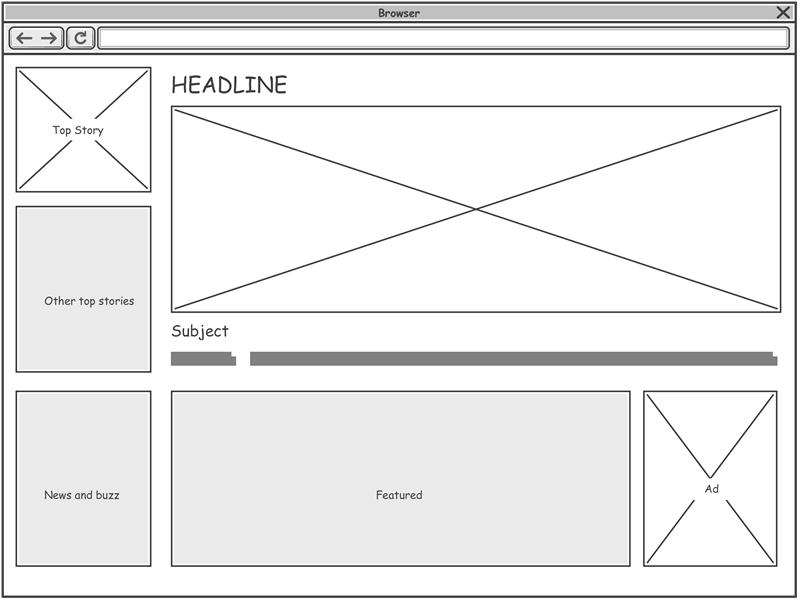


https://jsfiddle.net/ 可以貼上 HTML 點 run 看看效果

In [25]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://cdn-images.visual-paradigm.com/handbooks/agile-handbook/wireframe/02-newspaper-site-wireframe-example.png" },
                },
                { "type": "text", "text": "請根據這個 wireframe，產生一個 HTML 給我" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

```html
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<meta name="viewport" content="width=device-width, initial-scale=1.0" />
<title>Wireframe Layout</title>
<style>
  body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 10px;
  }
  /* Browser window styling */
  .browser {
    border: 2px solid #ccc;
    width: 100%;
    max-width: 1200px;
    margin: 0 auto;
  }
  /* Browser header */
  .browser-header {
    display: flex;
    align-items: center;
    background: #eee;
    padding: 5px;
  }
  /* Browser buttons (back, forward, refresh) */
  .browser-buttons {
    display: flex;
    gap: 5px;
    margin-right: 10px;
  }
  .button {
    width: 20px;
    height: 20px;
    background: #999;
    border-radius: 3px;
  }
  /* Browser address bar */
  .address-bar {
    flex: 1;
    height: 20px;
    background: #fff;
    border: 1px solid #ccc;
  }
  /* Main content area */
  .content {
    display: flex;
    padding: 10px;
  }
  /* Sidebar styles */
  

## 自行上傳檔案和使用 base64 上傳的範例 code

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# file_name = list(uploaded.keys())[0]

Saving Xnip2025-04-15_21-48-10.jpg to Xnip2025-04-15_21-48-10.jpg


In [27]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

file_name = r"D:\github\iSpan_LLM-NLP-cookbooks\Langchain_scratch\prompt-engineering\content\163185767309.jpg"


base64_image = encode_image(file_name)

messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url":  { "url" : f"data:image/jpeg;base64,{base64_image}" }
                },
                { "type": "text", "text": "Describe the image with zh-tw" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-nano")
print(x)

這是一張照片，畫面中有一位年輕女性坐在桌子前。她穿著黑色的無袖上衣，留著長髮，表情淡然，微笑著。她的右手抬起，手掌平放，似乎在做出某個手勢或示意。桌子上擺放著一些圓形的黑白棋子，可能是在玩圍棋或是其他棋類遊戲。背景是簡單的灰色牆壁，整體氛圍平靜且專注。


## 這個時間點(2025/4)，單純 OCR 用途會推薦 Gemini Flash 更划算

https://www.sergey.fyi/articles/gemini-flash-2

## 解讀 PDF 檔案

https://platform.openai.com/docs/guides/pdf-files?api-mode=chat

In [33]:
import urllib.request

url = "https://www.jkoam.com/webapi/File/de301c05-f0e2-4bbc-b8fa-ee77f6fba75d/2.%E8%A1%97%E5%8F%A3%E6%8A%95%E4%BF%A12025%E5%B9%B4%E7%AC%AC%E4%B8%80%E5%AD%A3%E6%8A%95%E8%B3%87%E5%B1%95%E6%9C%9B_%E7%BE%8E%E8%82%A1.pdf"
filename = "2025年第一季美國股市展望.pdf"  # 可自訂檔名與副檔名

try:
    urllib.request.urlretrieve(url, filename)
    print(f"檔案已下載並儲存為 {filename}")
except Exception as e:
    print("下載失敗，錯誤訊息：", e)

檔案已下載並儲存為 2025年第一季美國股市展望.pdf


In [34]:
import base64

with open("2025年第一季美國股市展望.pdf", "rb") as f:
    data = f.read()

base64_string = base64.b64encode(data).decode("utf-8")

In [35]:
base64_string

'JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0NhdGFsb2cvUGFnZXMgMiAwIFIvTGFuZyhlbikgL091dGxpbmVzIDcyIDAgUi9NZXRhZGF0YSA5OCAwIFIvVmlld2VyUHJlZmVyZW5jZXMgOTkgMCBSPj4NCmVuZG9iag0KMiAwIG9iag0KPDwvVHlwZS9QYWdlcy9Db3VudCAxMi9LaWRzWyAzIDAgUiAxOCAwIFIgMzYgMCBSIDM5IDAgUiA0MyAwIFIgNDcgMCBSIDUwIDAgUiA1NCAwIFIgNTcgMCBSIDYxIDAgUiA2MyAwIFIgNjUgMCBSXSA+Pg0KZW5kb2JqDQozIDAgb2JqDQo8PC9UeXBlL1BhZ2UvUGFyZW50IDIgMCBSL1Jlc291cmNlczw8L0V4dEdTdGF0ZTw8L0dTNSA1IDAgUi9HUzYgNiAwIFIvR1M3IDcgMCBSL0dTMTUgMTUgMCBSPj4vWE9iamVjdDw8L0ltYWdlOCA4IDAgUj4+L0ZvbnQ8PC9GMSAxMCAwIFIvRjIgMTYgMCBSPj4vUHJvY1NldFsvUERGL1RleHQvSW1hZ2VCL0ltYWdlQy9JbWFnZUldID4+L01lZGlhQm94WyAwIDAgOTYwIDU0MF0gL0NvbnRlbnRzIDQgMCBSL0dyb3VwPDwvVHlwZS9Hcm91cC9TL1RyYW5zcGFyZW5jeS9DUy9EZXZpY2VSR0I+Pi9UYWJzL1M+Pg0KZW5kb2JqDQo0IDAgb2JqDQo8PC9GaWx0ZXIvRmxhdGVEZWNvZGUvTGVuZ3RoIDUzNz4+DQpzdHJlYW0NCnicrZRNa9wwEIbvBv+HOSY5qJovfUAorG05tLe0Cz2EHkpI9tJtSfr/oSPbaXe7W9hsi2GEpZnRo3dGemobD95575HIR8jBg4qH54e2+XQF39rmzc1Hhc2PtkHY/HL2AT3rnvfjVdvcTu5hcfcuxWRWVOHZYoOoSwlIxSm

In [36]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "file",
                    "file": {
                        "filename": "tsmc-2024-q4.pdf",
                        "file_data": f"data:application/pdf;base64,{base64_string}",
                    }
                },
                { "type": "text", "text": "根據研報，未來市場展望和投資商機與風險?" }
            ] }
]

x = get_completion(messages, model="gpt-4.1-mini")
print(x)

根據街口投信2025年第一季美國股市展望研報（參考文件第11頁），未來市場展望、投資商機與風險整理如下：

### 市場展望
- **美國經濟溫和增長，軟著陸機會大**  
  美國經濟呈現溫和增長，通膨長期持續回落態勢不變，美國消費仍具韌性，勞動市場雖下滑但仍穩健，整體經濟環境對美股影響偏中性偏正向。
- **美股中長期向上格局不變，但短期需關注川普上任日期（1/20）**  
  目前美股利多因素已反映，評價面和技術面顯示不利方向，關稅和非法移民政策可能成為引發回檔的引爆點，明年初需審慎看待。
- **科技股分歧加劇，但AI相關類股表現看好**  
  受益AI帶動的半導體、軟體、大型CSP（雲端服務提供商）及大型科技股有望表現較佳。對整體半導體和半導體設備持較審慎態度。
- **消費股表現看好非必須消費優於必須消費**  
  美國經濟穩健，零售銷售韌性強，旅遊、住宿等數據強勁，油價下滑有助消費，且中國財政、貨幣、不動產政策刺激下，非必須消費企業獲利低基期、評價面偏低，明年可望有表現，特別是娛樂消費、運動用品、化妝品、汽車等類股。

### 投資商機
- **AI帶動科技股成長**  
  Nvidia、Meta、Google、Amazon、Tesla等AI及半導體相關企業獲利亮眼，預期中長期科技股優於非科技股。
- **非必須消費類股**  
  受益於消費韌性及中國政策刺激，非必須消費類股有望迎來表現機會。
- **川普政策相關概念股**  
  包括金融、醫療、傳統能源、加密貨幣等，短期表現強勢，但需警惕股價脫離基本面風險。

### 風險提示
- **評價面偏高，短期可能回檔**  
  標普本益比已超過五年平均加一個標準差，技術面遇阻力，短期可能面臨修正及震盪。
- **政策不確定性**  
  川普上任後的關稅、非法移民政策可能成為市場回檔引爆點。
- **市場情緒與技術面壓力**  
  近期利多因素已反映，技術面及評價面阻力大，需警惕短期震盪。
- **川普政策相關概念股股價脫離基本面**  
  市場對政策實施優先程度、時程及實際獲利挹注開始質疑，股價可能回落。

---

以上內容綜合自研報第2、3、4、5、6、8、9、10、11頁，並參考圖表與文字說明。若需更詳細數據或圖表說明，歡迎告知！


## 推薦結合 Structured output 功能: 讓我們直接轉出結構化數據

In [ ]:
!pip install openai

In [42]:
from openai import OpenAI
client = OpenAI( api_key=openai_api_key )

In [39]:
import urllib.request

url = "https://www.kgi.com.hk/zh-cn/-/media/files/kgishk/research-reports/tw-reports/2024/01/tsmc_2330-tt_05032025.pdf"
filename = "2025-tsmc-財報.pdf"  # 可自訂檔名與副檔名

try:
    urllib.request.urlretrieve(url, filename)
    print(f"檔案已下載並儲存為 {filename}")
except Exception as e:
    print("下載失敗，錯誤訊息：", e)


import base64

with open("2025-tsmc-財報.pdf", "rb") as f:
    data = f.read()

base64_string = base64.b64encode(data).decode("utf-8")

檔案已下載並儲存為 2025-tsmc-財報.pdf


In [40]:
from pydantic import BaseModel

class FinancialReport(BaseModel):
    quarter: str  # 4Q24
    revenue_usd_billion: float  # 營業收入淨額(美金十億元)
    revenue_twd: float  # 營業收入淨額
    gross_margin_percentage: float  # 營業毛利率
    operating_expenses: float  # 營業費用
    operating_margin_percentage: float  # 營業淨利率
    non_operating_income: float  # 營業外收入及支出
    net_income_attributable_to_parent: float  # 歸屬予母公司業主之本期淨利
    net_profit_margin_percentage: float  # 純益率
    earnings_per_share_twd: float  # 每股盈餘(新台幣元)
    return_on_equity_percentage: float  # 股東權益報酬率
    wafer_shipments_thousand_pieces: int  # 晶圓出貨量(千片十二吋約當晶圓)
    average_exchange_rate_usd_twd: float  # 平均匯率(美元/新台幣)

In [43]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "file",
                    "file": {
                        "filename": "2025-tsmc-財報.pdf",
                        "file_data": f"data:application/pdf;base64,{base64_string}",
                    }
                },
                { "type": "text", "text": "請截取出 2024 Q4 的財報數據" }
            ] }
]

result = client.beta.chat.completions.parse(model="gpt-4.1-mini",
                                        messages=messages,
                                        response_format=FinancialReport)

In [44]:
parsed_result = result.choices[0].message.parsed

In [45]:
parsed_result

FinancialReport(quarter='2024 Q4', revenue_usd_billion=31.65, revenue_twd=951413.0, gross_margin_percentage=58.1, operating_expenses=86102.0, operating_margin_percentage=45.9, non_operating_income=1241.0, net_income_attributable_to_parent=66409.0, net_profit_margin_percentage=44.6, earnings_per_share_twd=14.45, return_on_equity_percentage=45.2, wafer_shipments_thousand_pieces=1592, average_exchange_rate_usd_twd=30.0)

In [46]:
parsed_result.revenue_usd_billion

31.65

In [47]:
parsed_result.model_dump()

{'quarter': '2024 Q4',
 'revenue_usd_billion': 31.65,
 'revenue_twd': 951413.0,
 'gross_margin_percentage': 58.1,
 'operating_expenses': 86102.0,
 'operating_margin_percentage': 45.9,
 'non_operating_income': 1241.0,
 'net_income_attributable_to_parent': 66409.0,
 'net_profit_margin_percentage': 44.6,
 'earnings_per_share_twd': 14.45,
 'return_on_equity_percentage': 45.2,
 'wafer_shipments_thousand_pieces': 1592,
 'average_exchange_rate_usd_twd': 30.0}

### 名片圖片 結構化擷取

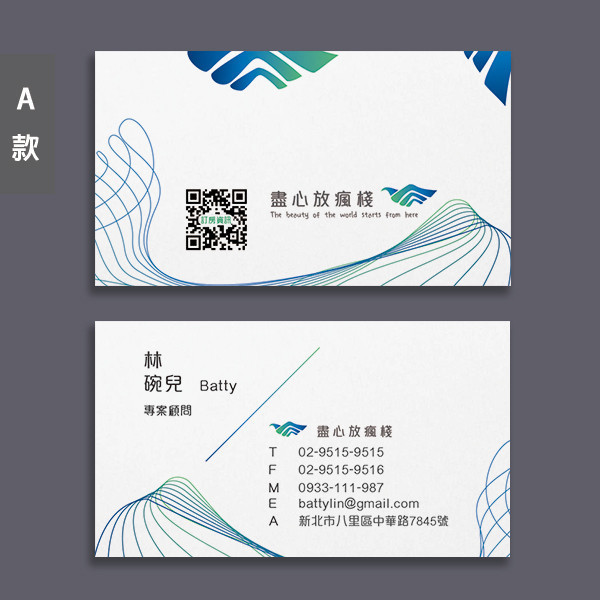

In [48]:
from pydantic import BaseModel

class NameCard(BaseModel):
  company_name: str
  company_english_name: str
  name: str
  english_name: str
  phone: str
  email: str
  website: str
  business_number_id: str
  address: str

In [49]:
messages = [
    { "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": { "url": "https://img.cloudimg.in/uploads/shops/12109/products/6a/6a7fbdfe4986b5ed9ed67b528014fcef.jpg" },
                },
                { "type": "text", "text": "擷取這張名片" }
            ] }
]

result = client.beta.chat.completions.parse(model="gpt-4.1-mini",
                                        messages=messages,
                                        response_format=NameCard)

In [50]:
parsed_result = result.choices[0].message.parsed

In [51]:
parsed_result

NameCard(company_name='盡心放瘋棧', company_english_name='The beauty of the world starts from here', name='林碗兒', english_name='Batty', phone='02-9515-9515; 0933-111-987', email='battylin@gmail.com', website='', business_number_id='', address='新北市八里區中華路7845號')

In [52]:
parsed_result.model_dump()

{'company_name': '盡心放瘋棧',
 'company_english_name': 'The beauty of the world starts from here',
 'name': '林碗兒',
 'english_name': 'Batty',
 'phone': '02-9515-9515; 0933-111-987',
 'email': 'battylin@gmail.com',
 'website': '',
 'business_number_id': '',
 'address': '新北市八里區中華路7845號'}